<a href="https://colab.research.google.com/github/sivasamy1/Machine_learning_research/blob/main/Stock_price_prediction_linear_regression_shuffle_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [263]:
def prepare_data(df,forecast_col, target_col,forecast_out,test_size):
    label = df[target_col].shift(-forecast_out)
    X = np.array(df[forecast_col])
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]
    label.dropna(inplace=True)
    y = np.array(label)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    response = [X_train, X_test , Y_train, Y_test , X_lately]
    return response

In [264]:
df = pd.read_csv("Bitcoin_8_30_2024-8_30_2025_historical_data_coinmarketcap.csv", delimiter=';')
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True)
df["timeClose"] = pd.to_datetime(df["timeClose"], utc=True)
df["timeHigh"] = pd.to_datetime(df["timeHigh"], utc=True)
df["timeLow"] = pd.to_datetime(df["timeLow"], utc=True)
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
df = df.sort_values(by="timeOpen", ascending=True).reset_index(drop=True)
# df = df[df.name == "2781"]

In [265]:
print(tabulate(df, headers='keys', tablefmt='github'))

|     | timeOpen                  | timeClose                        | timeHigh                  | timeLow                   |   name |     open |     high |      low |    close |      volume |   marketCap | timestamp                        |
|-----|---------------------------|----------------------------------|---------------------------|---------------------------|--------|----------|----------|----------|----------|-------------|-------------|----------------------------------|
|   0 | 2024-08-31 00:00:00+00:00 | 2024-08-31 23:59:59.999000+00:00 | 2024-08-31 00:34:00+00:00 | 2024-08-31 17:52:00+00:00 |   2781 |  59117.5 |  59432.6 |  58768.8 |  58969.9 | 1.24035e+10 | 1.16452e+12 | 2024-08-31 23:59:59.999000+00:00 |
|   1 | 2024-09-01 00:00:00+00:00 | 2024-09-01 23:59:59.999000+00:00 | 2024-09-01 00:17:00+00:00 | 2024-09-01 23:19:00+00:00 |   2781 |  58969.8 |  59062.1 |  57217.8 |  57325.5 | 2.45924e+10 | 1.13211e+12 | 2024-09-01 23:59:59.999000+00:00 |
|   2 | 2024-09-02 00:00:00+

In [266]:
forecast_col = ['open', 'close', 'high', 'low', 'volume', 'marketCap']
target_col = 'close'
forecast_out = 3
test_size = 0.46999999999999986

In [267]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,target_col, forecast_out, test_size);
learner = LinearRegression()

learner.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


LinearRegression()

In [268]:
score=learner.score(X_test,Y_test)
forecast= learner.predict(X_lately)
response={}
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9281948287742967, 'forecast_set': array([111279.13340206, 111981.3318207 , 108481.0760838 ])}


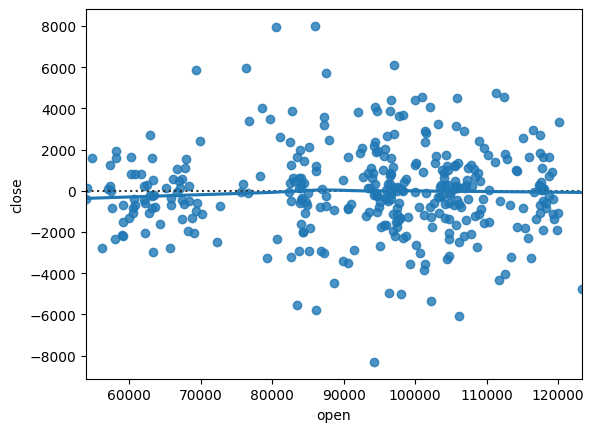

In [269]:
sns.residplot(x='open', y='close', data=df, lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

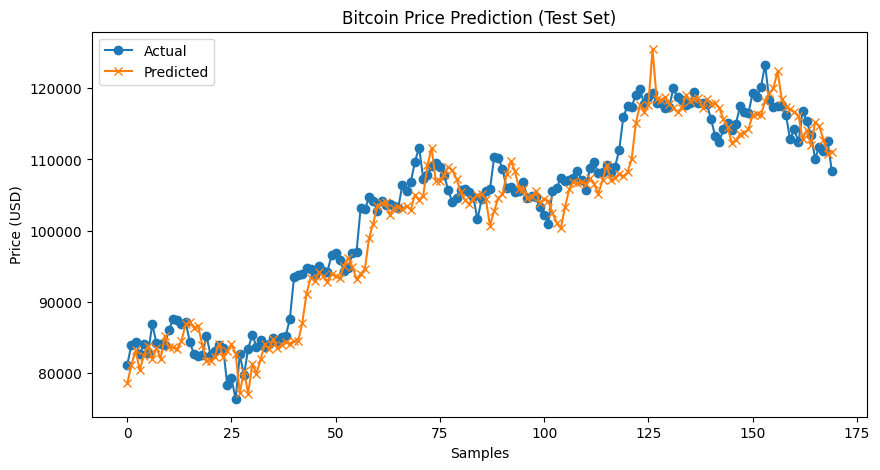

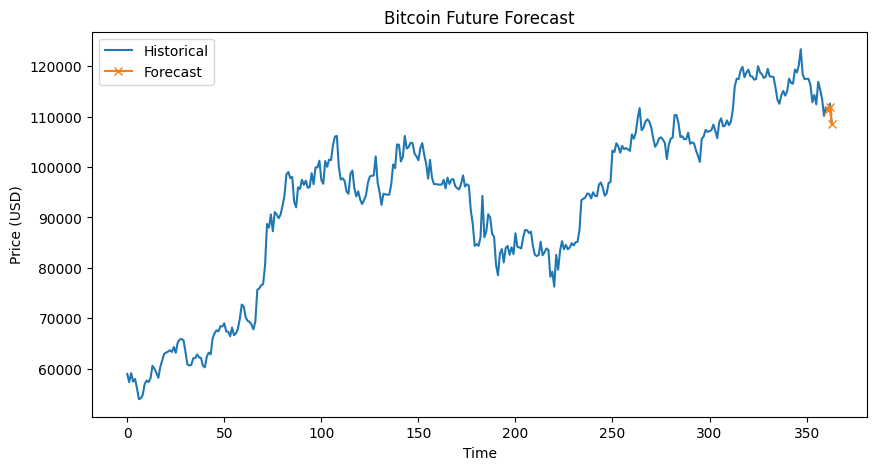

In [270]:
import matplotlib.pyplot as plt
y_pred = learner.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(Y_test1, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Bitcoin Price Prediction (Test Set)")
plt.xlabel("Samples")
plt.ylabel("Price (USD)")
plt.show()

forecast = learner.predict(X_lately)


future_index = df.index[-forecast_out:]

plt.figure(figsize=(10,5))
plt.plot(df[target_col].values, label="Historical")
plt.plot(future_index, forecast, label="Forecast", marker='x')
plt.legend()
plt.title("Bitcoin Future Forecast")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.show()


In [271]:
from sklearn.metrics import mean_squared_error
import numpy as np

results = []

for ts in np.arange(0.1, 0.99, 0.01):
    X_train, X_test, y_train, y_test, X_lately = prepare_data(
        df, forecast_col, target_col, forecast_out, ts
    )


    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((ts, r2, rmse))

results_df = pd.DataFrame(results, columns=["test_size", "R2_score", "RMSE"])
print(tabulate(results_df, headers='keys', tablefmt='github'))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too lar

|    |   test_size |      R2_score |             RMSE |
|----|-------------|---------------|------------------|
|  0 |        0.1  |    -0.22123   |   3369.44        |
|  1 |        0.11 |    -0.146471  |   3259.1         |
|  2 |        0.12 |    -0.518776  |   3662.03        |
|  3 |        0.13 |    -0.459095  |   3563.12        |
|  4 |        0.14 |    -0.502888  |   3511.51        |
|  5 |        0.15 |    -0.0427507 |   3392.7         |
|  6 |        0.16 |     0.174453  |   3292.93        |
|  7 |        0.17 |     0.366263  |   3216.05        |
|  8 |        0.18 |     0.459688  |   3148.79        |
|  9 |        0.19 |     0.559144  |   3168.69        |
| 10 |        0.2  |     0.620309  |   3210.68        |
| 11 |        0.21 |     0.642446  |   3191.78        |
| 12 |        0.22 |     0.607459  |   3390.86        |
| 13 |        0.23 |     0.632024  |   3280.79        |
| 14 |        0.24 |     0.629459  |   3393.83        |
| 15 |        0.25 |     0.628919  |   3433.73  

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


/tmp/ipython-input-1466197727.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


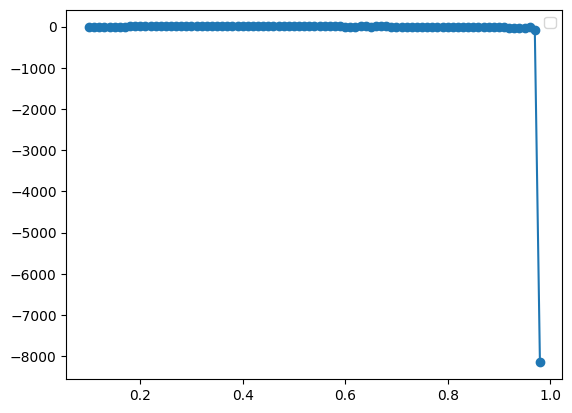

In [272]:
plt.plot(results_df["test_size"], results_df["R2_score"], marker='o')
plt.legend()
plt.show()

In [273]:
max_idx = results_df["R2_score"].idxmax()
results_df.loc[max_idx, "test_size"]

np.float64(0.45999999999999985)

In [274]:
 results_df.loc[max_idx, "R2_score"]

np.float64(0.9296428144232112)

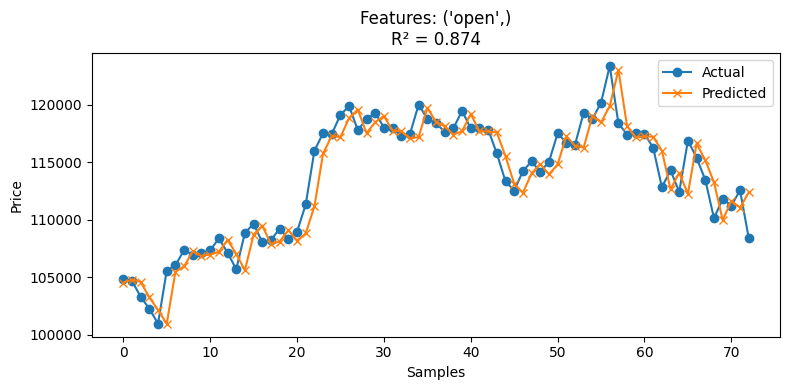

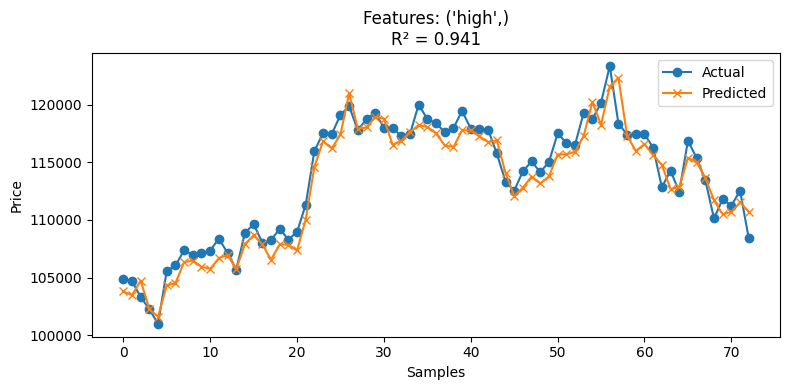

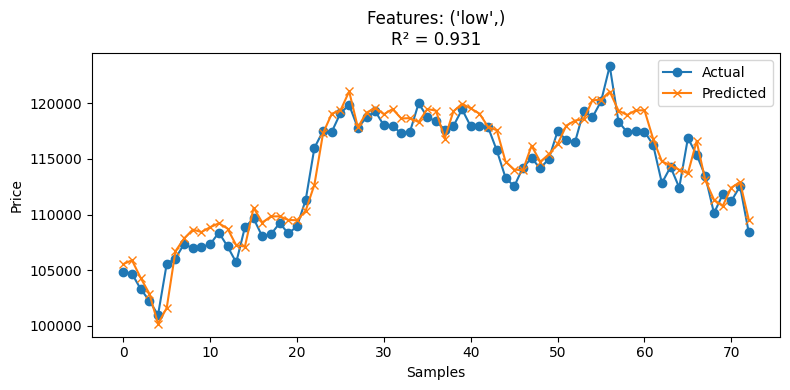

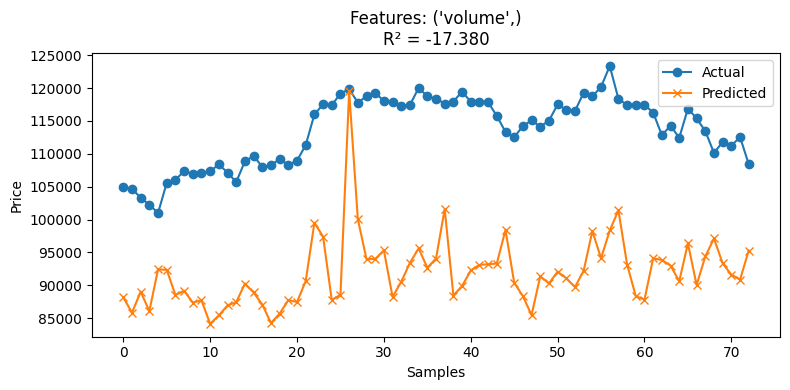

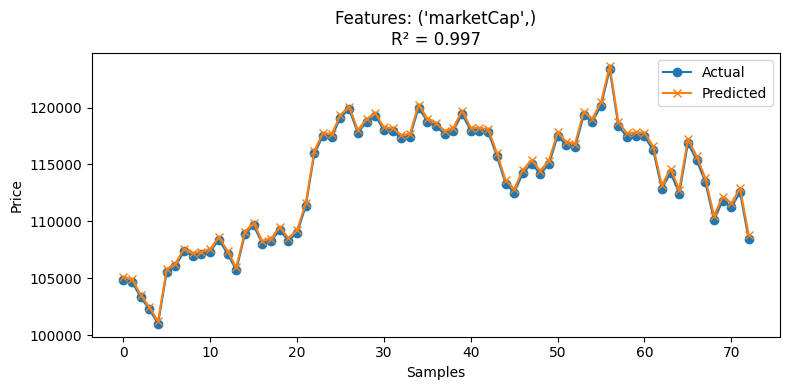

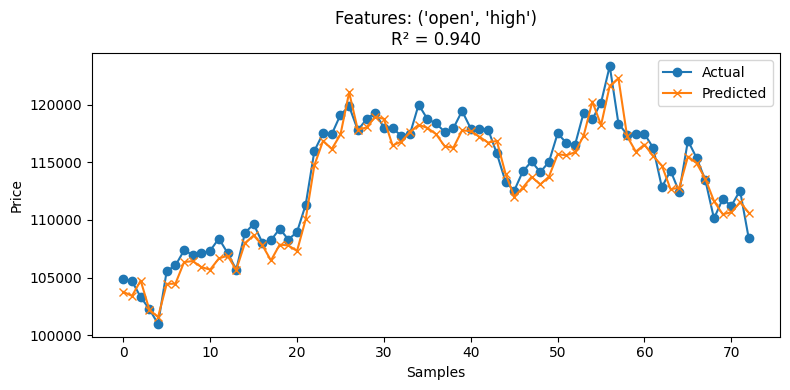

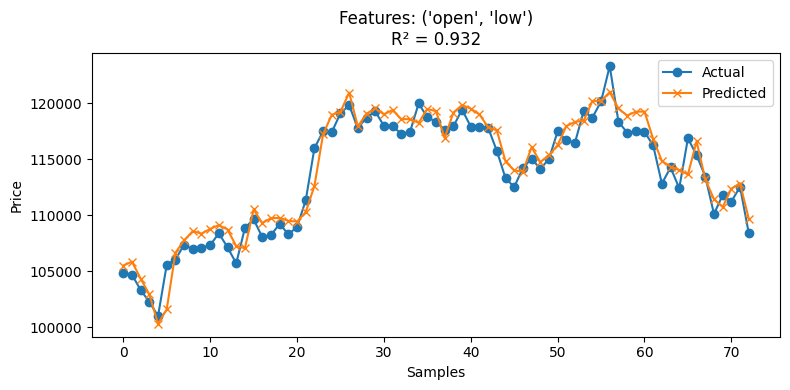

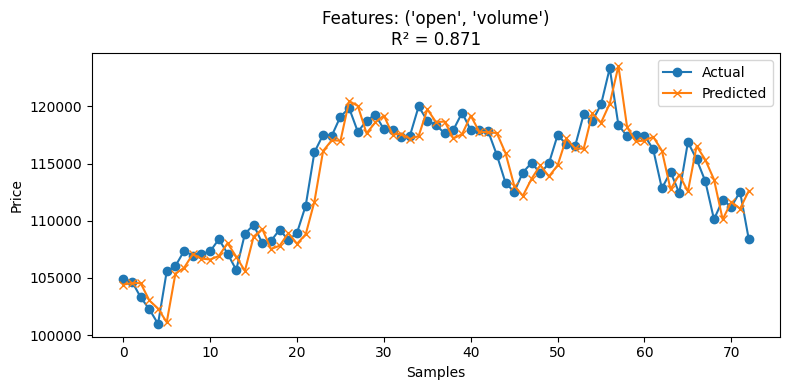

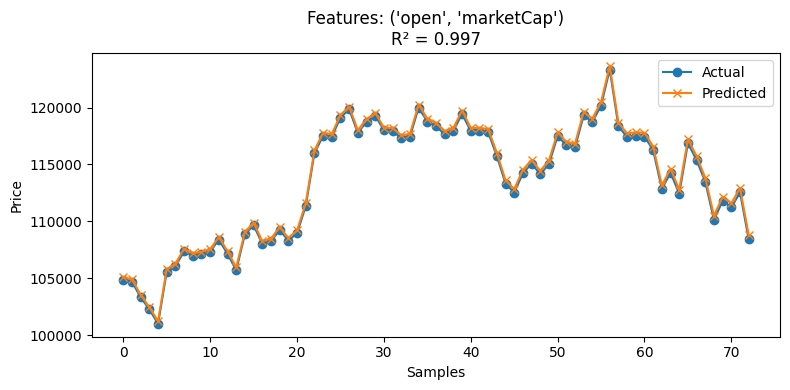

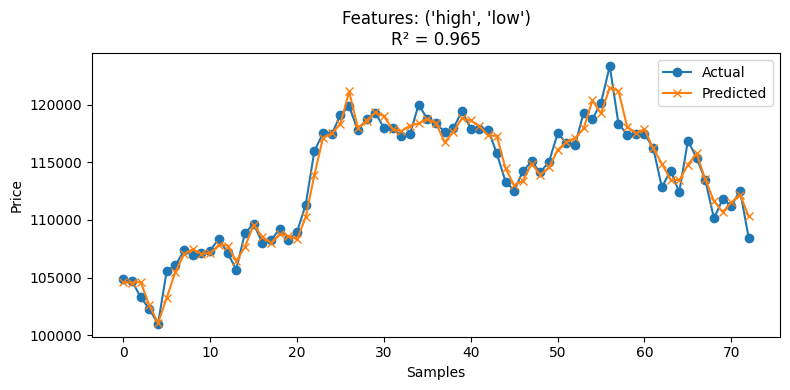

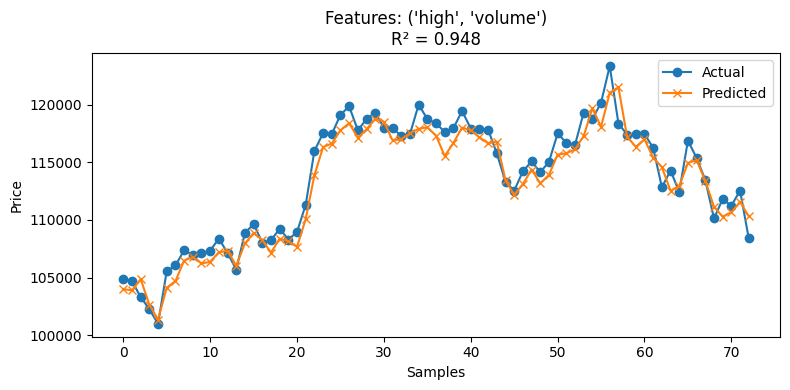

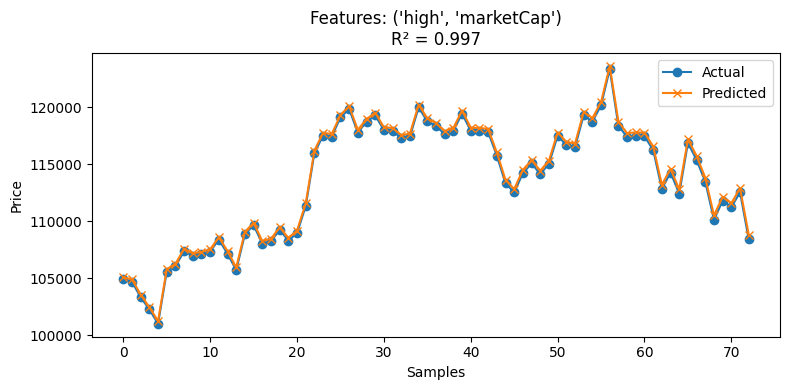

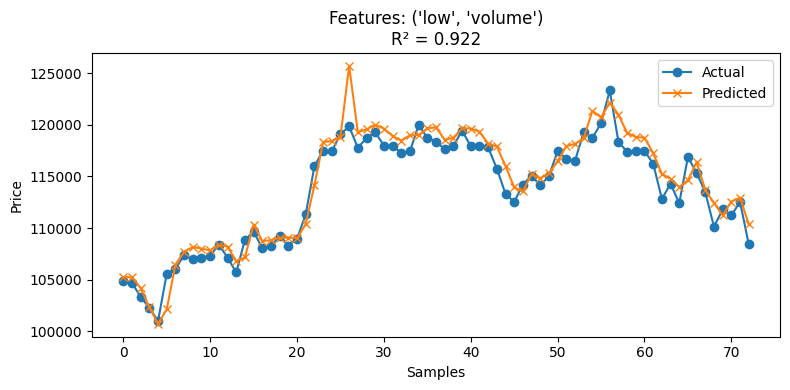

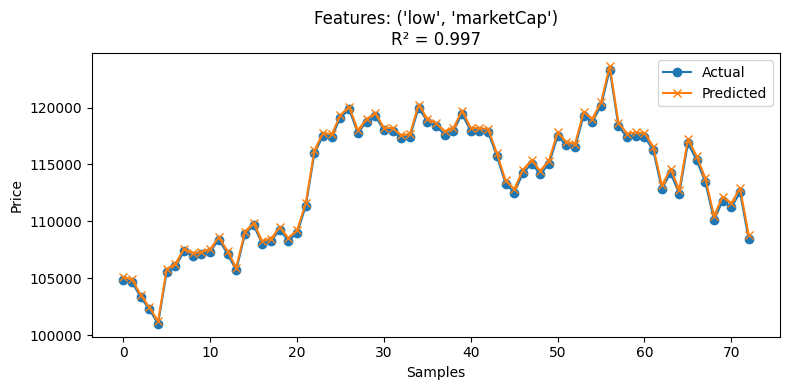

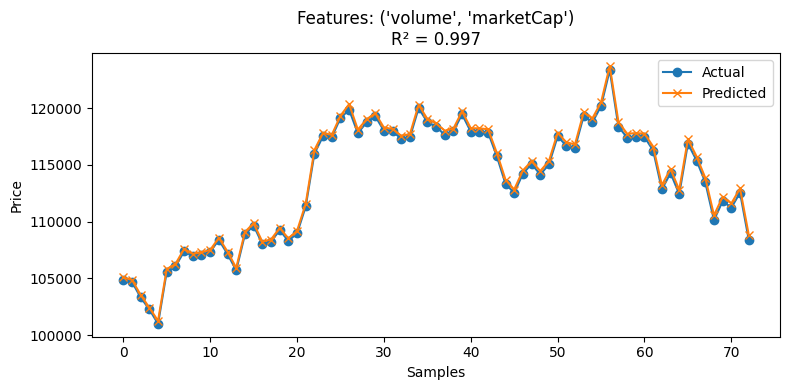

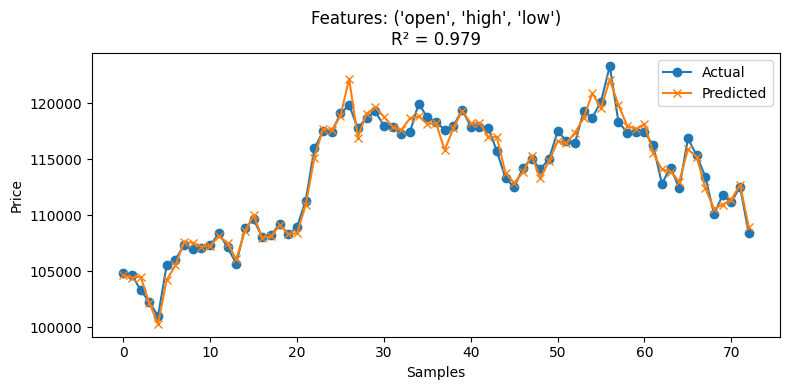

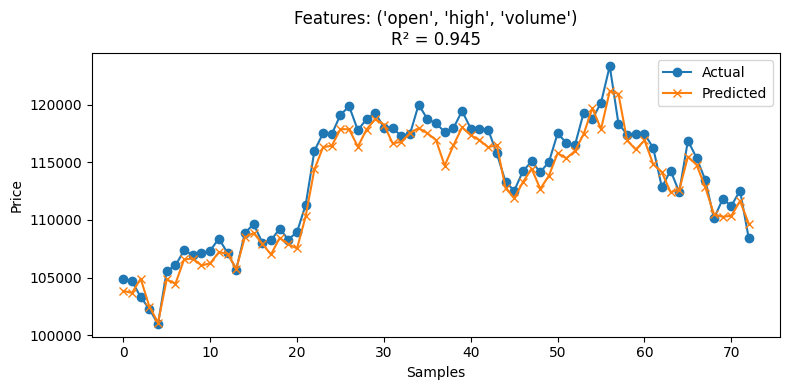

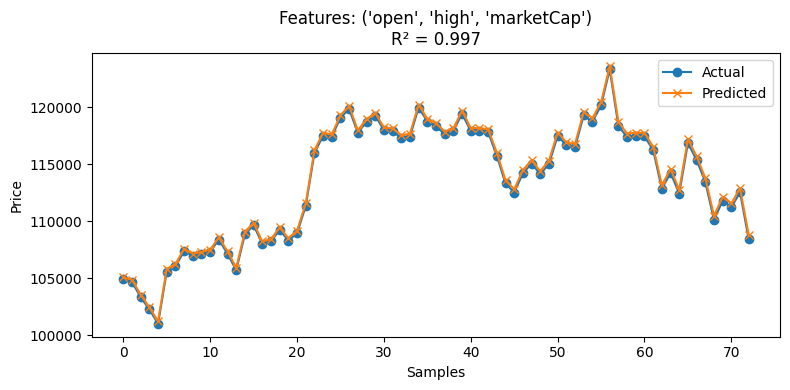

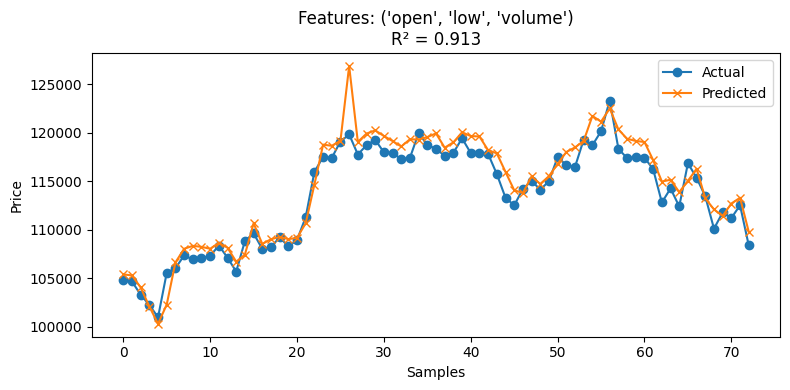

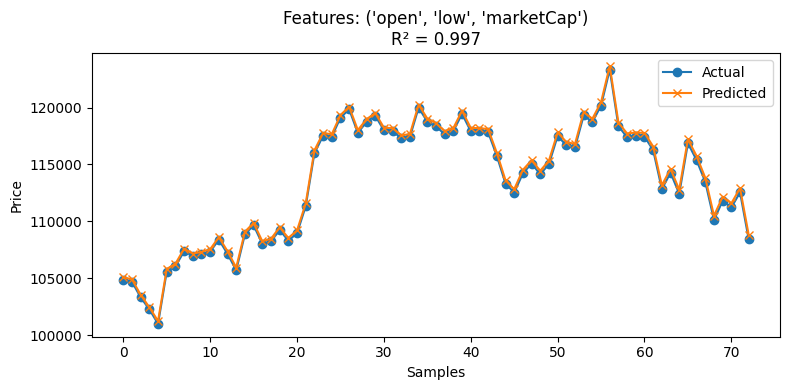

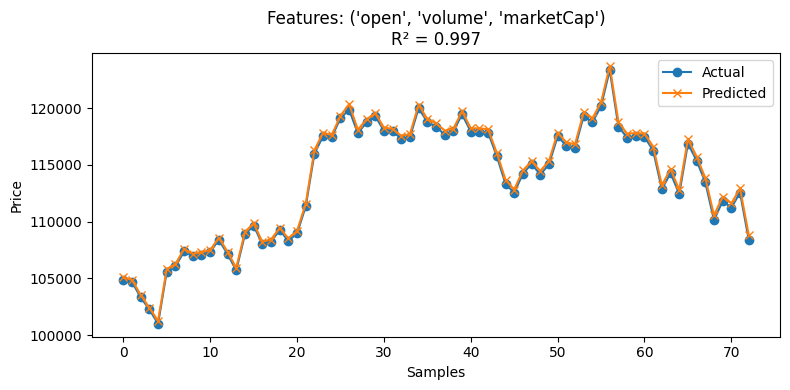

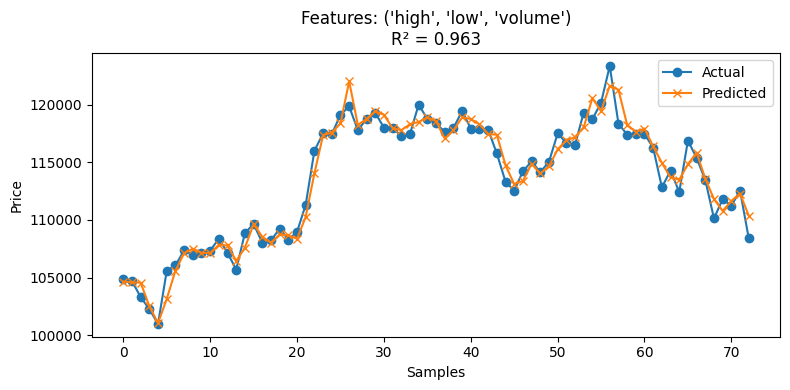

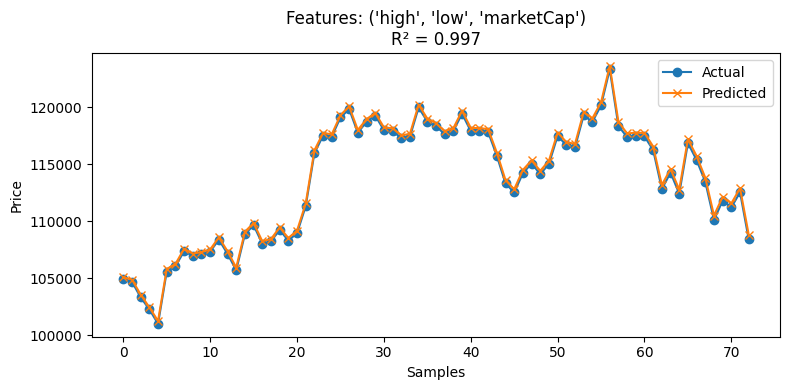

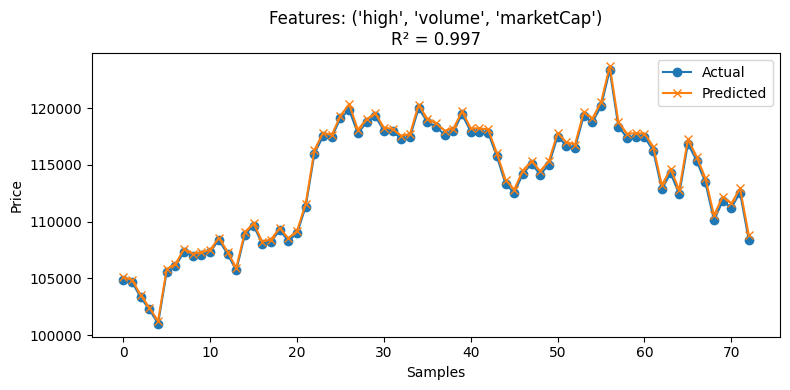

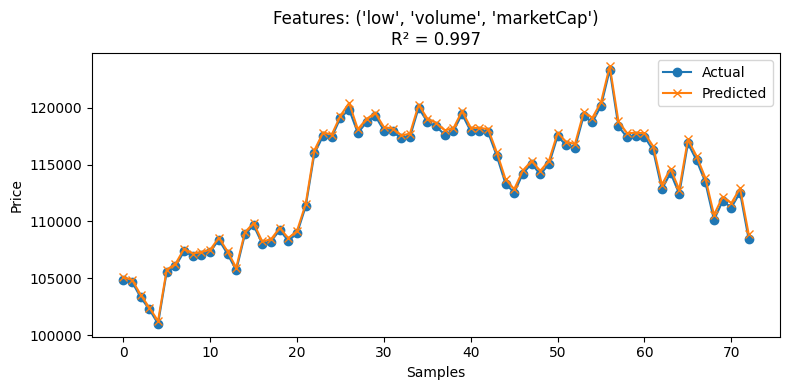

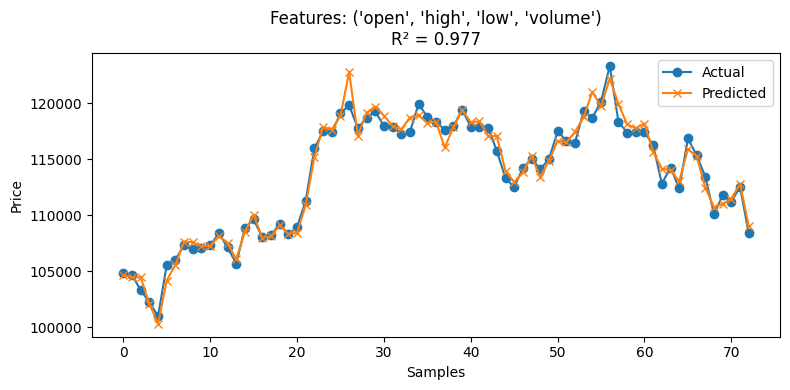

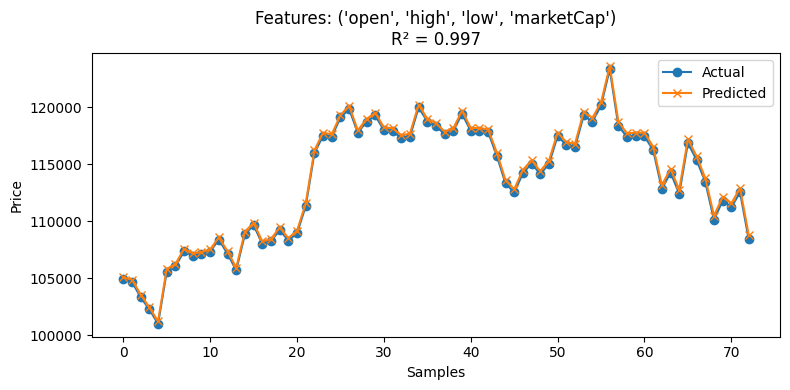

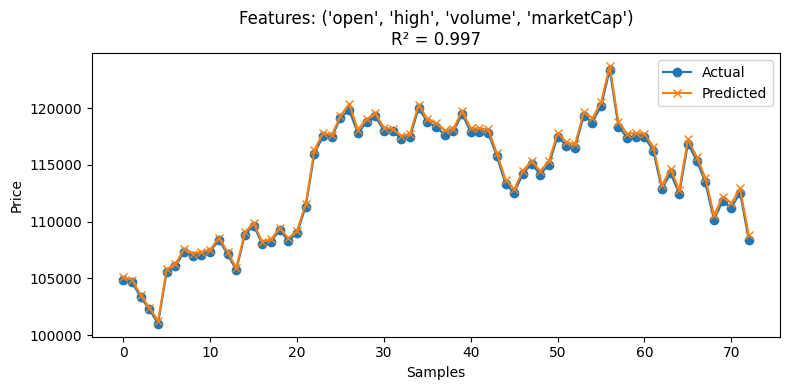

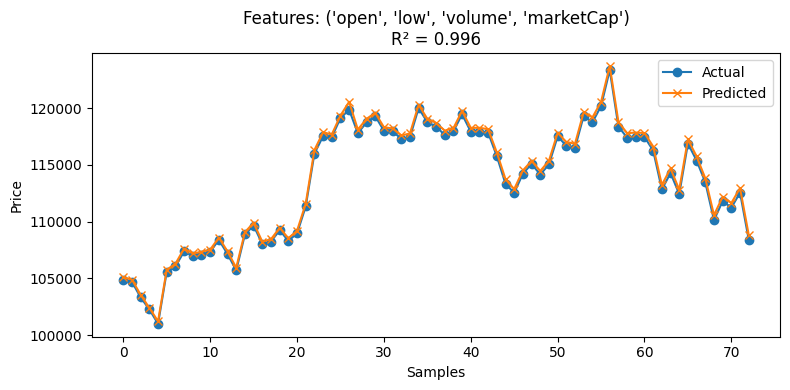

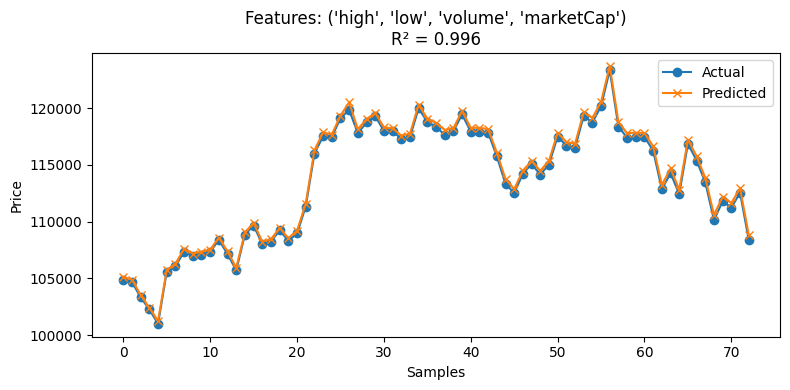

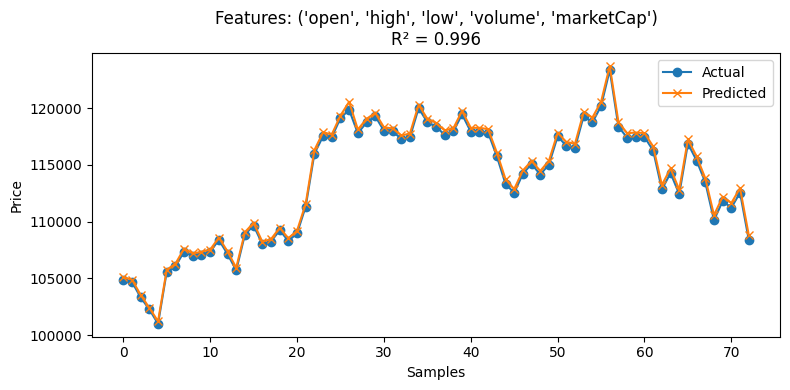

In [275]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features_col = ['open', 'high', 'low', 'volume', 'marketCap']
target_col = 'close'

for r in range(1, len(features_col)+1):
    for combo in itertools.combinations(features_col, r):
        X = df[list(combo)]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=False
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)

        plt.figure(figsize=(8,4))
        plt.plot(y_test.values, label="Actual", marker='o')
        plt.plot(y_pred, label="Predicted", marker='x')
        plt.title(f"Features: {combo}\nR² = {r2:.3f}")
        plt.xlabel("Samples")
        plt.ylabel("Price")
        plt.legend()
        plt.tight_layout()
        plt.show()


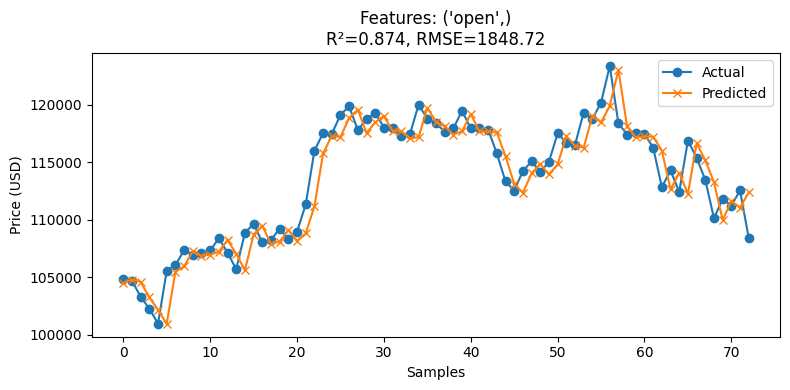

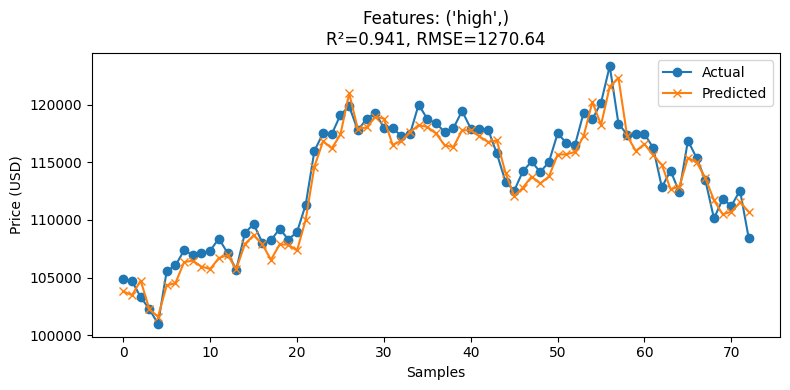

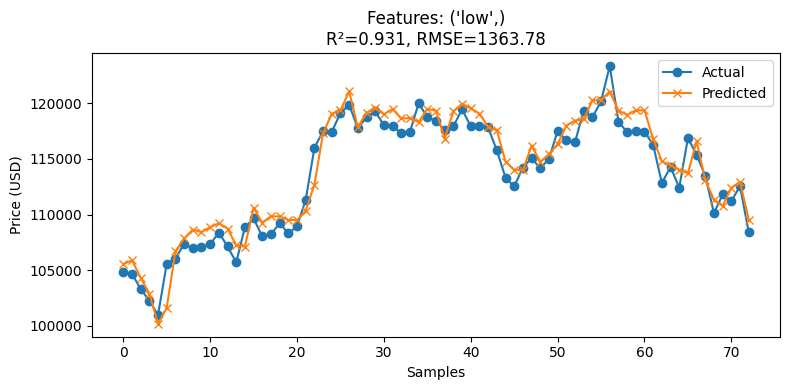

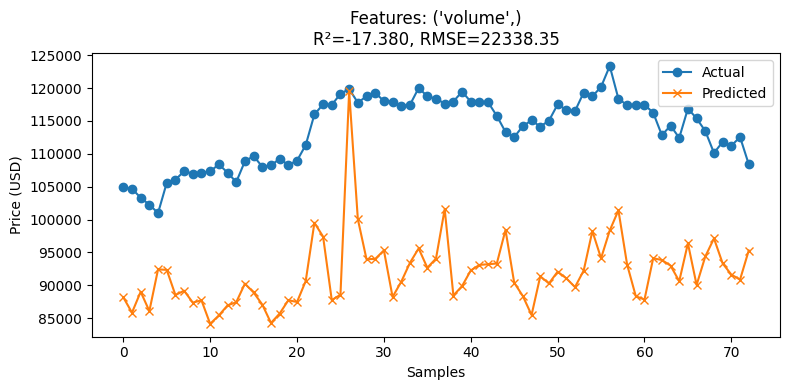

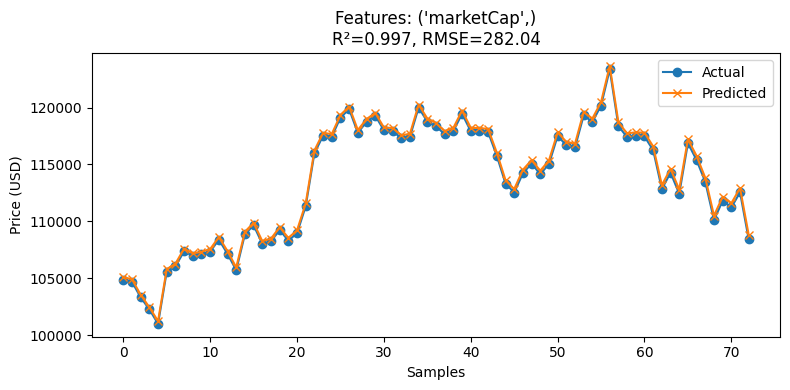

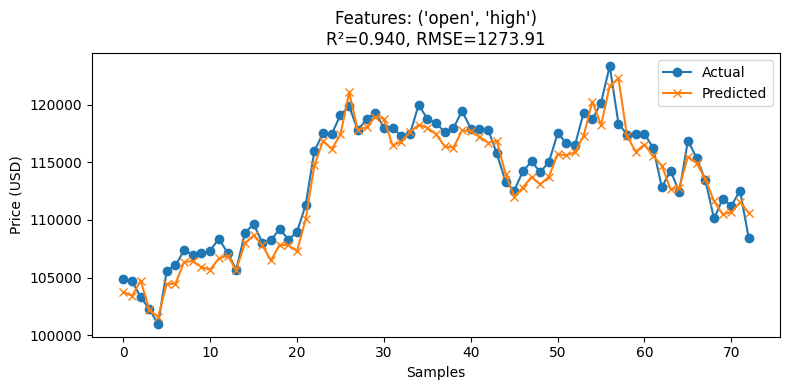

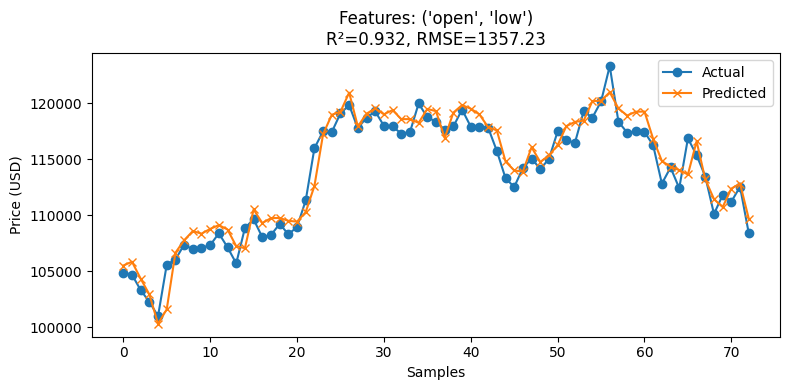

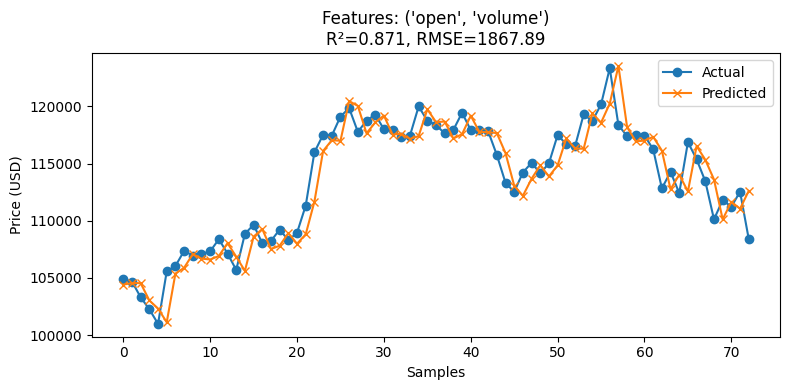

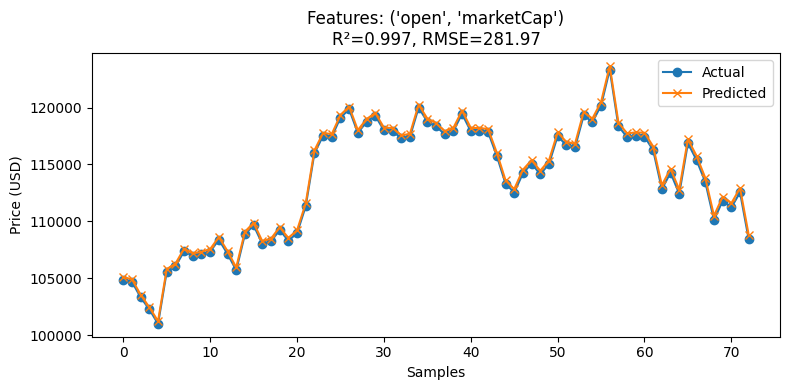

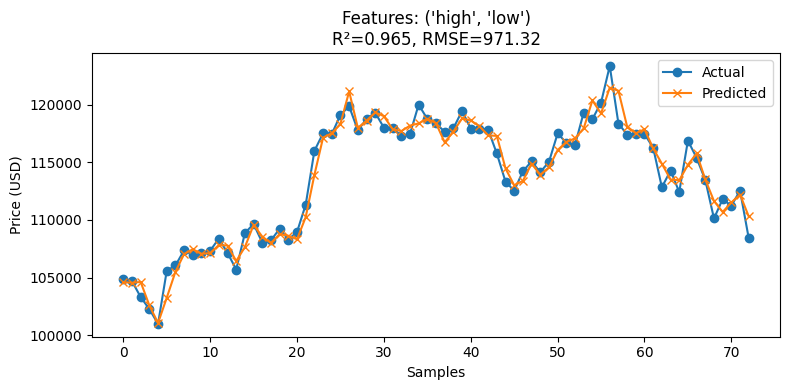

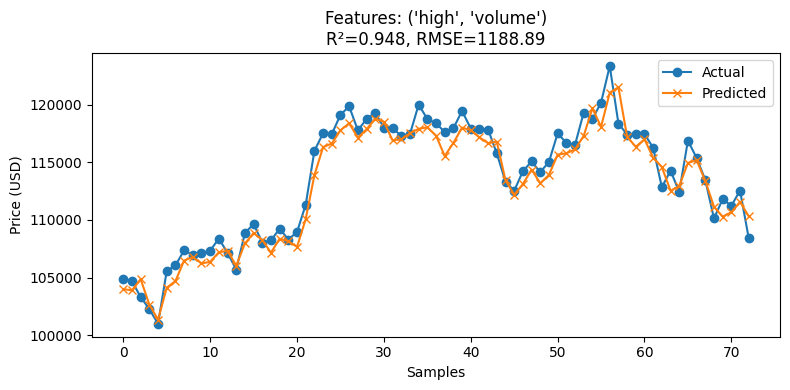

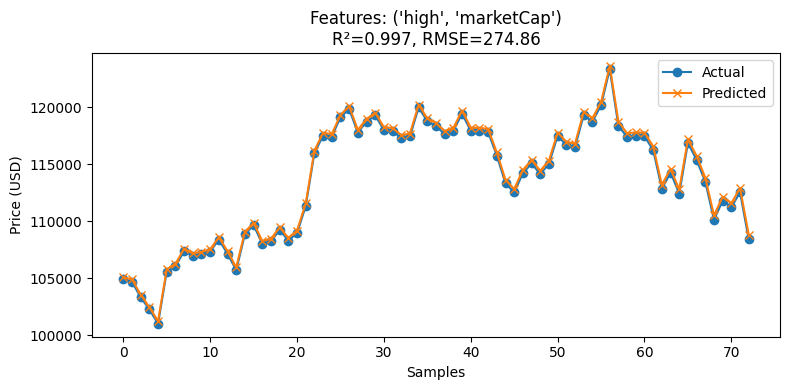

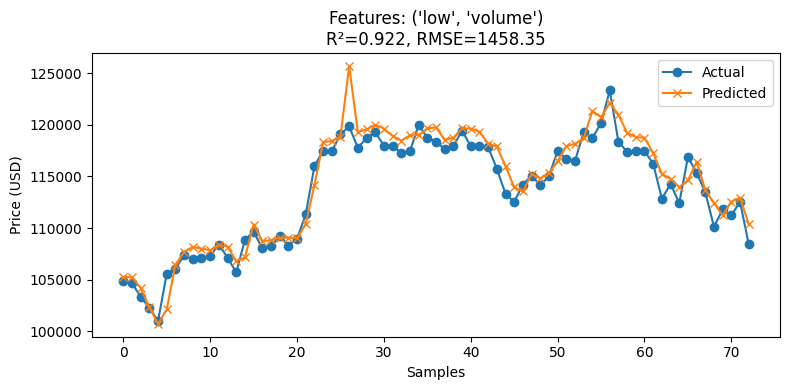

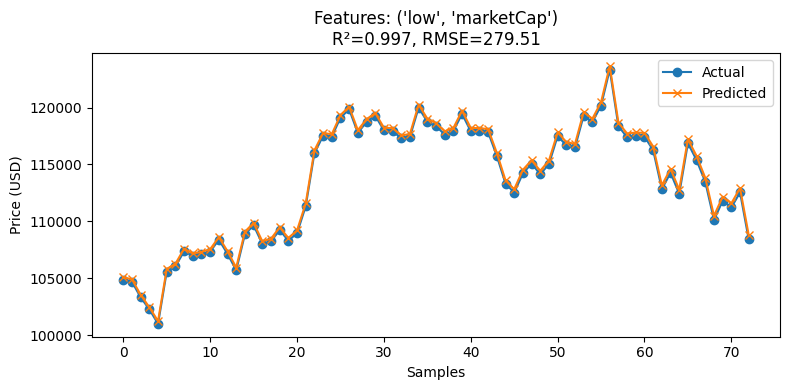

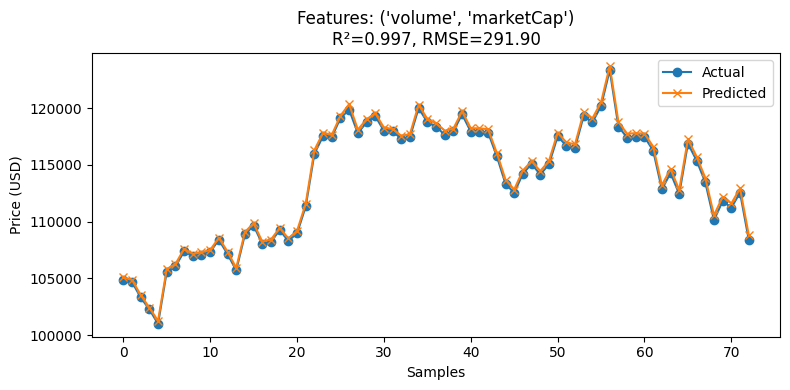

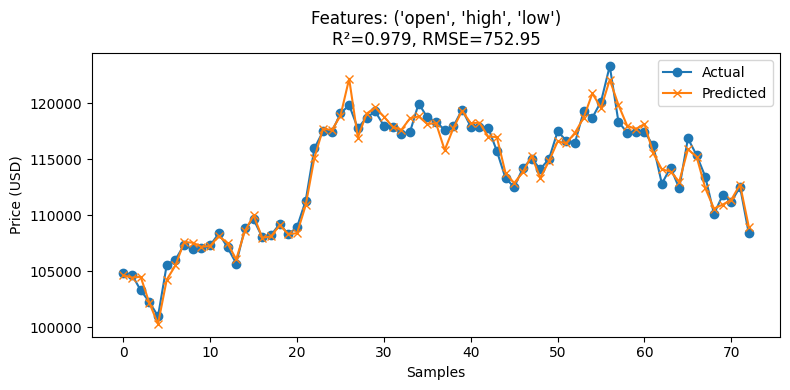

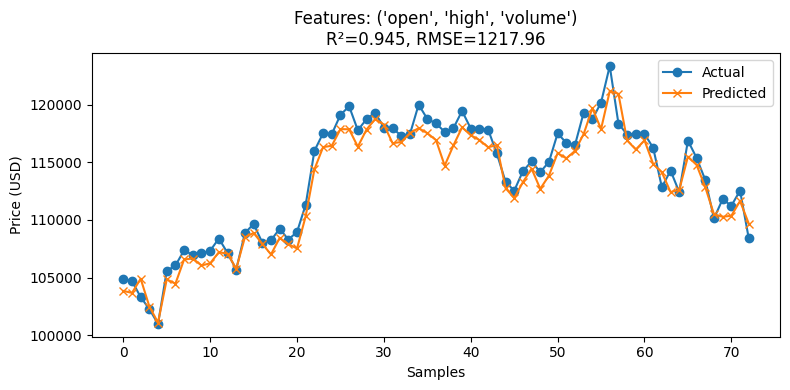

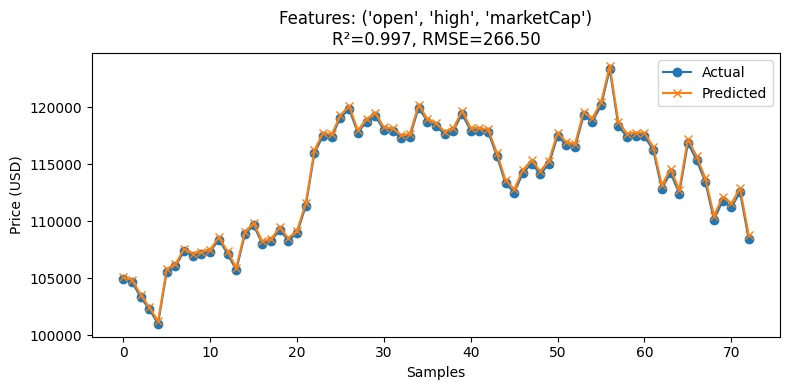

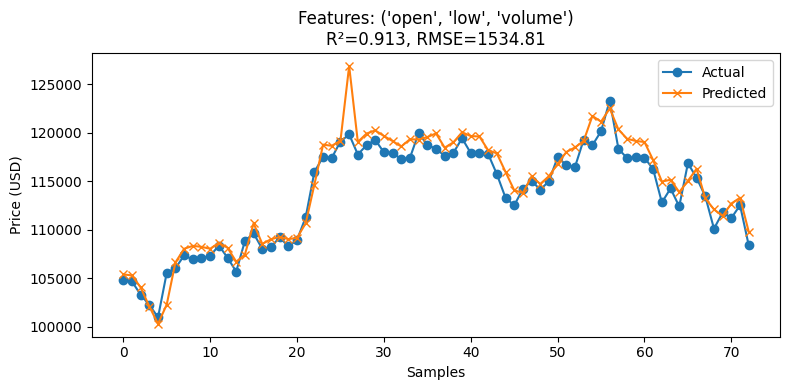

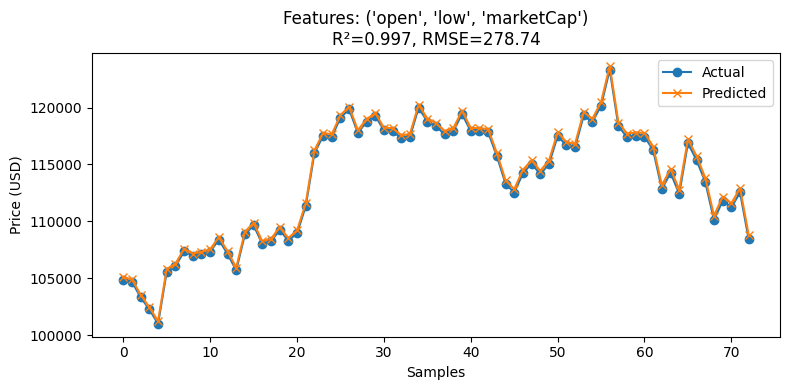

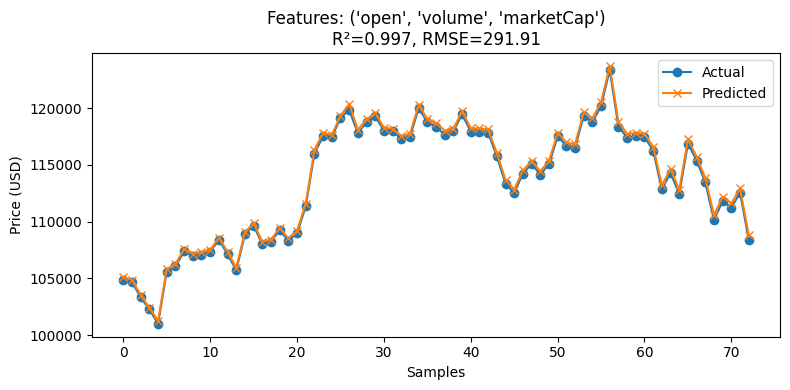

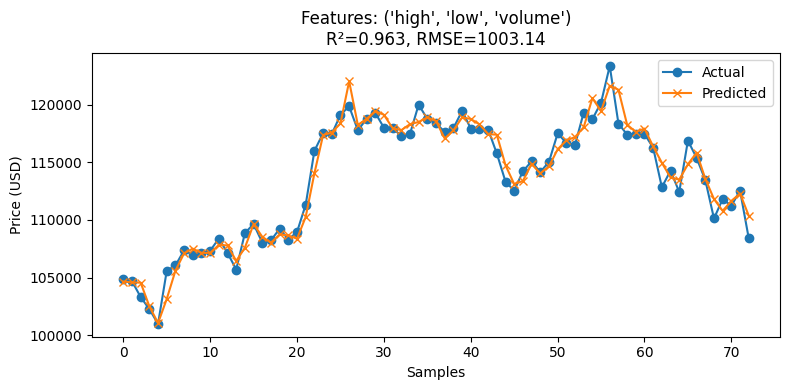

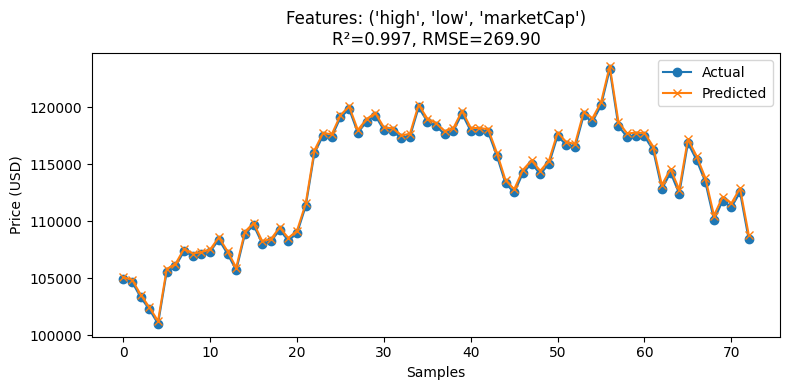

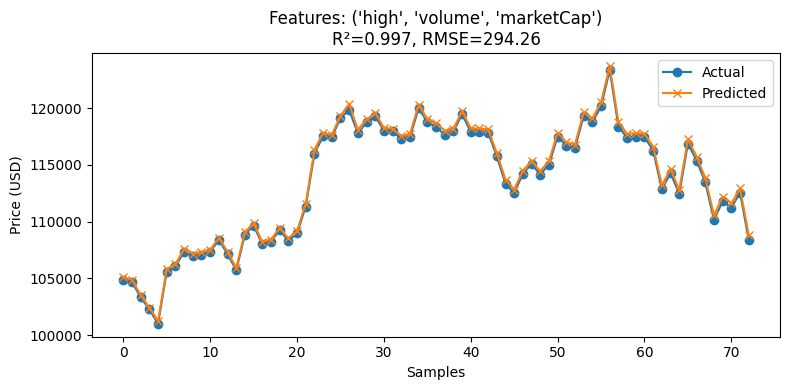

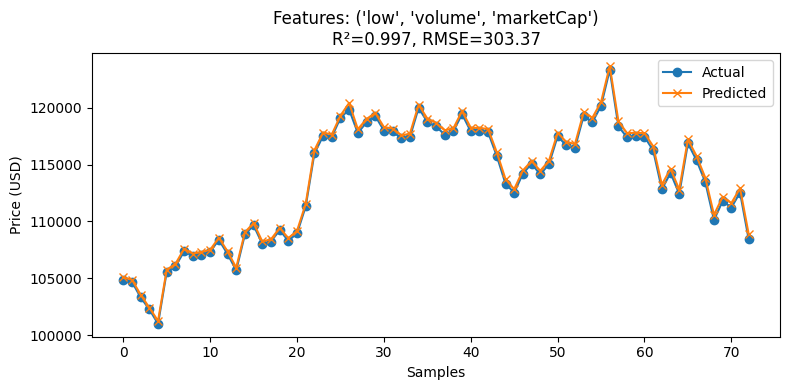

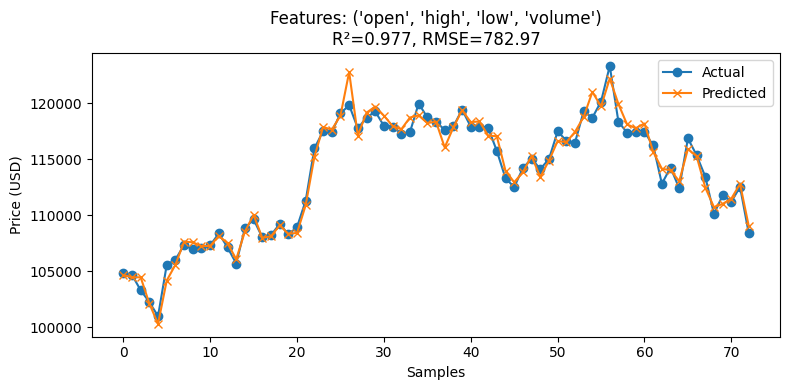

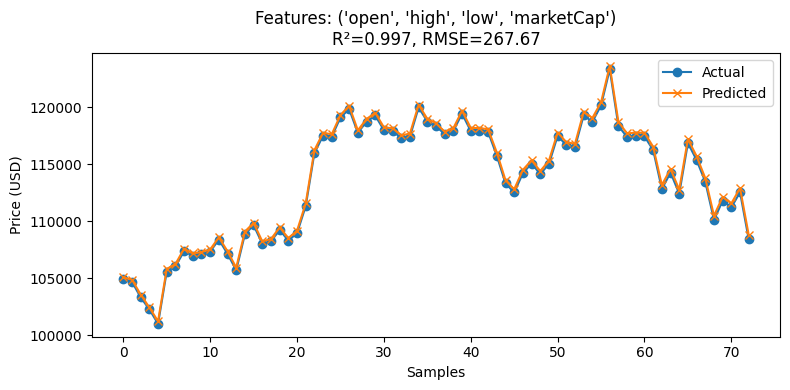

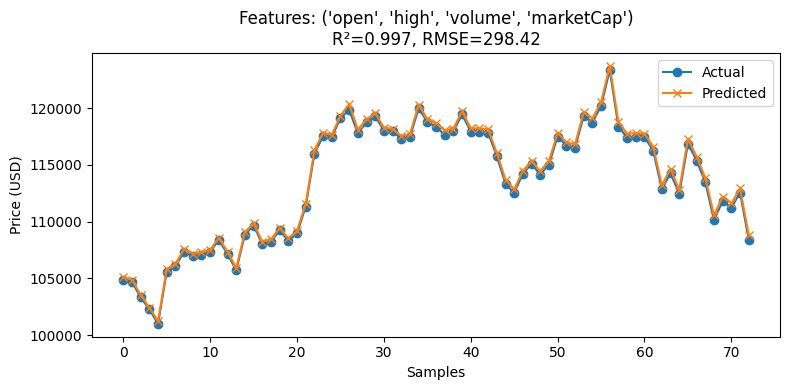

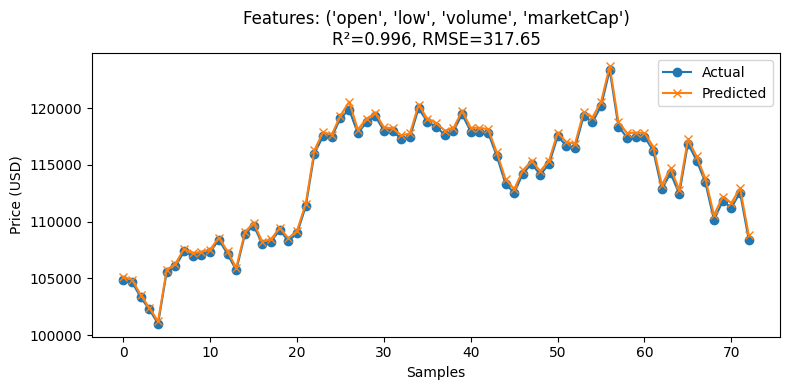

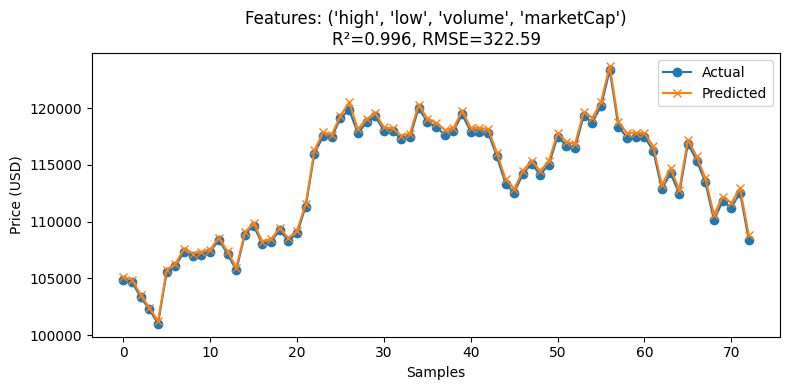

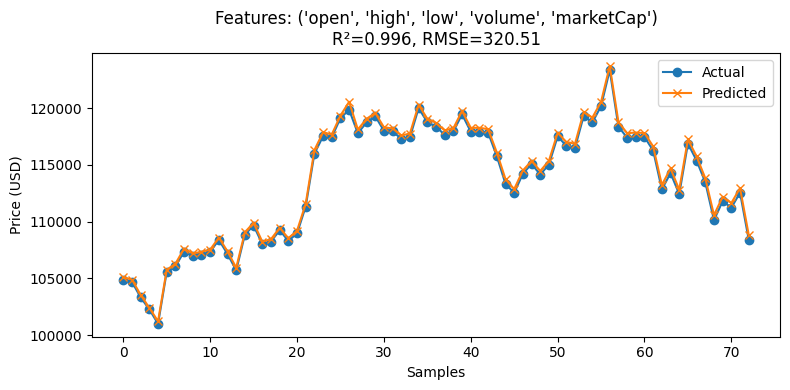

    features                                          r2_score       rmse
--  ----------------------------------------------  ----------  ---------
17  ('open', 'high', 'marketCap')                     0.997384    266.496
26  ('open', 'high', 'low', 'marketCap')              0.997361    267.669
22  ('high', 'low', 'marketCap')                      0.997317    269.896
11  ('high', 'marketCap')                             0.997217    274.865
19  ('open', 'low', 'marketCap')                      0.997138    278.744
13  ('low', 'marketCap')                              0.997122    279.511
 8  ('open', 'marketCap')                             0.997071    281.972
 4  ('marketCap',)                                    0.99707     282.038
14  ('volume', 'marketCap')                           0.996862    291.904
20  ('open', 'volume', 'marketCap')                   0.996861    291.909
23  ('high', 'volume', 'marketCap')                   0.996811    294.259
27  ('open', 'high', 'volume', 'market

In [276]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features_col = ['open', 'high', 'low', 'volume', 'marketCap']
target_col = 'close'

results = []

for r in range(1, len(features_col)+1):
    for combo in itertools.combinations(features_col, r):
        X = df[list(combo)]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results.append({'features': combo, 'r2_score': r2, 'rmse': rmse})

        plt.figure(figsize=(8,4))
        plt.plot(y_test.values, label="Actual", marker='o')
        plt.plot(y_pred, label="Predicted", marker='x')
        plt.title(f"Features: {combo}\nR²={r2:.3f}, RMSE={rmse:.2f}")
        plt.xlabel("Samples")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results).sort_values(by='r2_score', ascending=False)
print(tabulate(results_df, headers='keys'))
